Josip Koprčina, Data Mining Project 2020/2021 \
A simple project to find out what features of a league of legends game (https://riot.com/3nCKCsN) influence winning the most.

In [2]:
# Importing needed libraries
import pandas as pd 
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
# Importing data 
data_challenger = pd.read_csv("./data/Challenger_Ranked_Games.csv") 
data_grand_master = pd.read_csv("./data/GrandMaster_Ranked_Games.csv")
data_master = pd.read_csv("./data/Master_Ranked_Games.csv")
frames = [data_challenger, data_grand_master, data_master]
data = pd.concat(frames)
    
# Removing red-side information because most is symetric to blue-side data
# Removing win label from X and making y out of it
data = data[data.columns[0:26]]
y = data[data.columns[2]]
X = pd.DataFrame(data)
del X["gameId"]
del X['blueWins']

features = list(X.columns)
labels = ["Win", "Lose"]

In [26]:
# Splitting into random 10-k folds and using decision trees

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

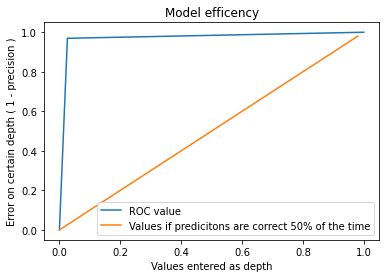

In [27]:
# Plotting the quality of our decision tree model

fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr1, tpr1, label = "ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], label = "Values if predicitons are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")

In [6]:
# Using k-means to classify